In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

C:\Users\nout\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [5]:
data = boston.data

In [6]:
feature_names = boston.feature_names

In [7]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
price = boston.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=7) 

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_test_scaled =  scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [17]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [19]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

C:\Users\nout\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 19.612415  , -26.17697   ],
       [-23.834833  ,  23.134815  ],
       [ -0.86846364,  10.100083  ],
       [ 16.886662  , -11.144531  ],
       [-26.412931  ,  15.840965  ],
       [ -6.4733186 ,   0.60173965],
       [ 19.649128  , -14.516851  ],
       [ 14.971015  , -15.40644   ],
       [-19.794247  ,  29.492672  ],
       [ 17.895731  ,  -6.368676  ],
       [  8.459126  ,   3.857584  ],
       [ 14.106942  ,  -9.809593  ],
       [ -2.4939802 ,  15.569426  ],
       [  3.2680147 ,  -0.37042272],
       [ -6.9093924 ,   2.9879785 ],
       [  8.983139  ,  -8.378992  ],
       [-22.036547  ,  26.31222   ],
       [ 16.799248  , -13.121923  ],
       [-20.309286  ,  23.929419  ],
       [ -3.987581  ,   0.44788232],
       [-13.288665  ,  -8.568729  ],
       [  3.308423  , -11.001008  ],
       [-26.23956   ,  18.144077  ],
       [ 13.843548  , -24.324959  ],
       [ 17.729275  , -13.661565  ],
       [ 16.247307  ,  -7.333144  ],
       [ -1.7973758 ,  -6.8116903 ],
 

In [20]:
X_train_tsne.shape

(404, 2)

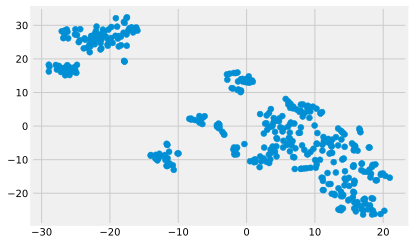

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [24]:
lables_train = kmeans.fit_predict(X_train_scaled)

In [25]:
pd.value_counts(lables_train)

2    172
0    127
1    105
dtype: int64

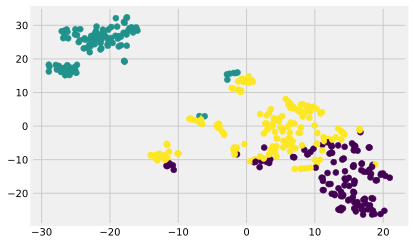

In [26]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=lables_train)

In [27]:
print('0: {}'.format(y_train[lables_train == 0].mean()))
print('1: {}'.format(y_train[lables_train == 1].mean()))
print('2: {}'.format(y_train[lables_train == 2].mean()))
print('0: {}'.format(X_train.loc[lables_train == 0, 'CRIM'].mean()))
print('1: {}'.format(X_train.loc[lables_train == 1, 'CRIM'].mean()))
print('2: {}'.format(X_train.loc[lables_train == 2, 'CRIM'].mean()))


0: 27.934645669291342
1: 15.513333333333334
2: 22.805232558139537
0: 0.09492952755905511
1: 12.049776666666668
2: 0.5670764534883717
